# Etudiant: Mohamed Sabkhi
## Classe: 2IDSD1

# Part1 : DATA preparation and exploration

In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#importing the dataset
dataset=pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.shape

(50, 5)

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


mean=m=1/n somme(xi)
variance=1/n somme(xi-m)**2
ecart-type=std

In [5]:
print(dataset['R&D Spend'].mean())
print(dataset['R&D Spend'].var())
print(dataset['R&D Spend'].std())

73721.61559999999
2107017150.167544
45902.25648230753


# Boxplot


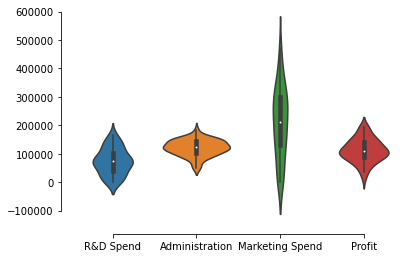

In [6]:
import seaborn as sns
f, ax = plt.subplots()
sns.violinplot(data=dataset)
sns.despine(offset=10, trim=True);

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Scatterpolt only quantitative variables

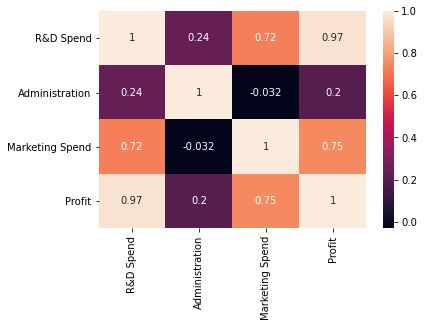

In [8]:
import seaborn as sns

corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

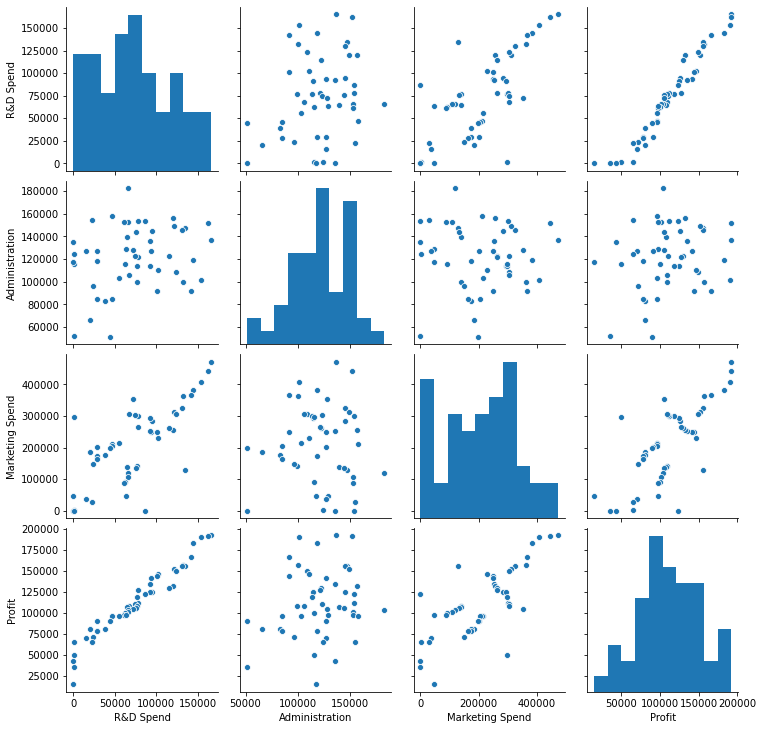

In [9]:
sns.pairplot(dataset)

### le coefficient de pearson:
#### c'est un indice reflétant une relation linéaire entre deux variables continues , il varie entre -1 et 1 
#### 0 indique une relation null <br>
#### une val négative sig que lorsque une variable augmente l'autre diminue
#### une val positive indique que les variables augmentent ensemble

In [10]:
dataset.corr(method='pearson')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [11]:
print(dataset['Administration'].kurtosis())
print(dataset['Administration'].skew())

0.22507113536865386
-0.4890248099671768


# Independent and dependent variables

In [12]:
x=dataset.iloc[:,0:4]
y=dataset.iloc[:,4]
x.shape

(50, 4)

# Frequency encoding the independent categorical data

In [13]:
dummies = pd.get_dummies(dataset["State"], drop_first=True)
df = pd.concat([dataset,dummies],axis=1)
dummies.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [14]:
df1 =df.drop(["State"], axis=1)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## Splitting the Dataset into the training set and test set

In [15]:
X_train,X_test,y_train, y_test= train_test_split(df1,y,test_size=0.2, random_state=42)

In [16]:
X_train.shape

(40, 6)

In [17]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)


In [18]:
predictions = lm.predict(X_test)


In [19]:
print('Train Score:', lm.score(X_train,y_train))
print('Test Score: ', lm.score(X_test,y_test))

Train Score: 1.0
Test Score:  1.0


In [20]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,predictions))

r2_score 1.0


In [21]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
13,91992.39,135495.07,252664.93,134307.35,0,0
39,38558.51,82982.09,174999.30,81005.76,0,0
30,61994.48,115641.28,91131.24,99937.59,1,0
45,1000.23,124153.04,1903.93,64926.08,0,1
17,94657.16,145077.58,282574.31,125370.37,0,1


### The estimated/predicted parts of the multiple regression equation

In [22]:
lm.coef_


array([ 1.07834723e-15,  3.92653907e-16, -6.55887166e-16,  1.00000000e+00,
       -4.14287032e-12,  4.11937130e-13])

In [23]:
lm.intercept_


0.0

# Part 3: Building the optimal model using the backward elimination

In [24]:
import statsmodels.api as sm
X = np.append(arr = np.ones((50,1)),values = df1,axis =1)
X.shape
X[0:5,:]
X_opt= X[:,[0,1,2,3,4,5]]


In [25]:
regressor_ols = sm.OLS(endog =y, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.094e+31
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:00:46   Log-Likelihood:                 1148.0
No. Observations:                  50   AIC:                            -2284.
Df Residuals:                      44   BIC:                            -2272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.823e-11   2.95e-11     -3.325      0.002   -1.58e-10   -3.87e-11
x1         -6.661e-16    3.8e-16     -1.754      0.086   -1.43e-15    9.95e-17
x2           4.58e-16   1.53e-16      2.992      0.005     1.5e-16    7.66e-16
x3          2.203e-16   5.15e-17      4.280      0.000    1.17e-16    3.24e-16
x4             1.0000    4.4e-16   2.27e+15      0.000       1.000       1.000
x5           9.55e-12   8.57e-12      1.114      0.271   -7.72e-12    2.68e-11
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.308
Skew:                           0.005   Prob(JB):                        0.857
Kurtosis:                       2.616   Cond. No.                     2.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_opt2 = X[:,[0,3,4,5]]
regressor_ols2 = sm.OLS(endog =y, exog=X_opt2).fit()
regressor_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.627e+31
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:00:46   Log-Likelihood:                 1127.8
No. Observations:                  50   AIC:                            -2248.
Df Residuals:                      46   BIC:                            -2240.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.01e-10   1.75e-11     -5.770      0.000   -1.36e-10   -6.57e-11
x1         -7.893e-17   7.22e-17     -1.093      0.280   -2.24e-16    6.65e-17
x2             1.0000   2.16e-16   4.63e+15      0.000       1.000       1.000
x3         -2.308e-11   1.25e-11     -1.842      0.072   -4.83e-11    2.15e-12
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.366
Skew:                           0.194   Prob(JB):                        0.833
Kurtosis:                       2.841   Cond. No.                     8.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt2 = X[:,[3,4,5]]
regressor_ols2 = sm.OLS(endog =y, exog=X_opt2).fit()
regressor_ols2.summary()